(512, 512)

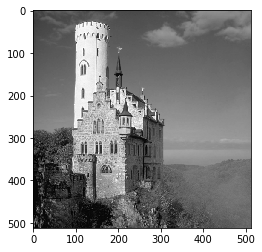

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.measure



image = np.array(cv2.imread('H:/CV/assignment 2/test.png',0))

plt.rcParams['image.cmap'] = 'gray'
plt.imshow(image)
image.shape


In [2]:
def zero_pad(X, pad):
    
    X_pad = np.pad(X, ((pad, pad), (pad, pad)), 'constant', constant_values=0)
    
    
    return X_pad

In [3]:
#x_pad = zero_pad(image, 1)
#plt.imshow(x_pad)
#x_pad.shape

In [4]:
k =[]

#sharpen
k.append(np.array([[0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]]))

#laplacian 
k.append(np.array([[0, 1, 0], 
                      [1, -4, 1], 
                      [0, 1, 0]]))

#emboss 
k.append(np.array([[-2, -1, 0], 
                   [-1, 1, 1], 
                   [0, 1, 2]]))

#outline 
k.append(np.array([[-1, -1, -1], 
                    [-1, 8, -1], 
                    [-1, -1, -1]]))

#bottom_sobel 
k.append(np.array([[-1, -2, -1], 
                         [0, 0, 0], 
                         [1, 2, 1]]))

#left_sobel 
k.append(np.array([[1, 0, -1], 
                       [2, 0, -2], 
                       [1, 0, -1]]))

#right_sobel 
k.append(np.array([[-1, 0, 1], 
                        [-2, 0, 2], 
                        [-1, 0, 1]]))

#top_sobel 
k.append(np.array([[1, 2, 1], 
                      [0, 0, 0], 
                      [-1, -2, -1]]))
'''basic vertical edge detection filter'''
filter0 = np.array([[[1, 0, 1],
                  [1, 0, 1],
                  [1, 0, 1]],
                  [[1, 0, 1],
                  [1, 0, 1],
                  [1, 0, 1]],
                  [[1, 0, 1],
                  [1, 0, 1],
                  [1, 0, 1]]])

j = ['sharpen', 'laplacian', 'emboss', 'outline', 'bottom_sobel', 'left_sobel', 'right_sobel', 'top_sobel']

In [5]:
def convolve2d(image, kernel):
    
    
    output = np.zeros(image.shape)
    img_pad = zero_pad(image, 1)

    imgh = image.shape[0]
    imgw = image.shape[1]
    kh = kernel.shape[0]
    kw = kernel.shape[1]
    h=kh//2
    w=kw//2




    for i in range (1, imgh-h):
        for j in range (1, imgw-w):
            dotp =0
            for x in range (kh):
                for y in range (kw):
                    dotp = dotp + kernel[x][y] * img_pad[i-1+x][j-1+y]

                output[i][j] = dotp



    
    return output

In [6]:
result = []
for i in range (8):
    #print(i)
    result.append(convolve2d(image, k[i]))




result[1].shape


(512, 512)

In [7]:
#plt.imshow(result[5].astype('uint8'))

In [8]:
def plot(j,l):
    w = 10
    h = 10
    fig = plt.figure(figsize=(10, 10))
    columns = 8
    rows = 1

    
    ax = []
    a=0
    for i in range(columns*rows):
        img = np.random.randint(10, size=(h,w))
        # create subplot and append to ax
        ax.append( fig.add_subplot(rows, columns, i+1) )
        ax[-1].set_title(""+str(l[i]))  # set title
        plt.imshow(j[i])
        a+=1


    plt.show()

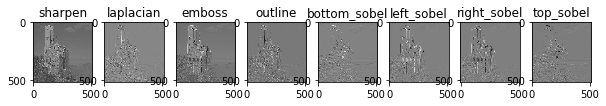

In [9]:
plot(result,j)

In [10]:
relu_data = []
def relu(img):
    for i in range(8):
        img[i]=np.maximum(0 , img[i])
        relu_data.append(img[i])

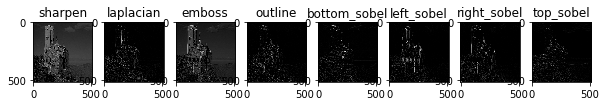

In [11]:
relu(result)
plot(relu_data,j)

In [12]:
asus = relu_data[0]
for i in range (7):
    asus = np.add(asus , relu_data[i+1])

(512, 512)

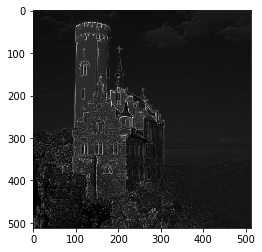

In [13]:
plt.imshow(asus)
asus.shape

In [14]:
def maxpooling(a):
    M = a.shape[0]
    N = a.shape[1]
    K = 2
    L = 2

    MK = M // K
    NL = N // L
    return (a[:MK*K, :NL*L].reshape(MK, K, NL, L).max(axis=(1, 3)))

In [15]:
result = []
for i in range (8):
    #print(i)
    result.append(convolve2d(asus, k[i]))
result[1].shape

(512, 512)

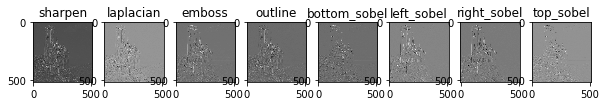

In [16]:
plot(result,j)

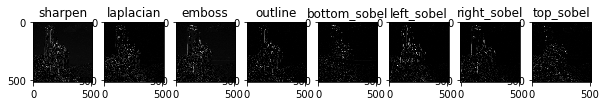

In [17]:
relu_data = []
relu(result)
plot(relu_data,j)

In [18]:
asus = relu_data[0]
for i in range (7):
    asus = np.add(asus , relu_data[i+1])

(512, 512)

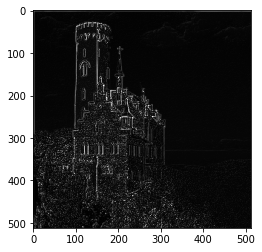

In [19]:
plt.imshow(asus)
asus.shape

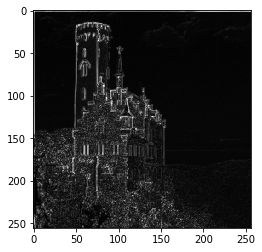

In [20]:
jamy = maxpooling(asus)
#print(jamy)
plt.imshow(jamy)
jamy.shape

In [22]:
result = []
for i in range (8):
    #print(i)
    result.append(convolve2d(jamy, k[i]))
result[1].shape

(256, 256)

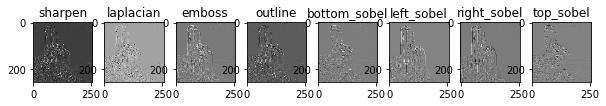

In [23]:
plot(result,j)

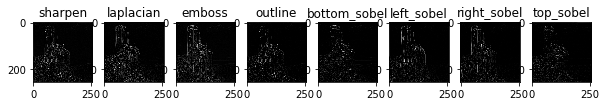

In [24]:
relu_data = []
relu(result)
plot(relu_data,j)

In [25]:
asus = relu_data[0]
for i in range (7):
    asus = np.add(asus , relu_data[i+1])

(256, 256)

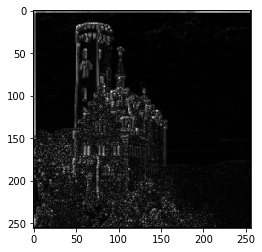

In [26]:
plt.imshow(asus)
asus.shape

(128, 128)

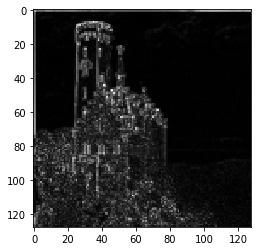

In [27]:
jamy = maxpooling(asus)
#print(jamy)
plt.imshow(jamy)
jamy.shape

In [28]:
result = []
for i in range (8):
    #print(i)
    result.append(convolve2d(jamy, k[i]))
result[1].shape

(128, 128)

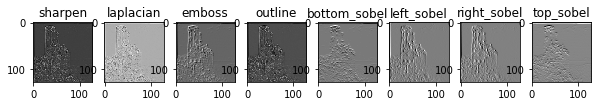

In [29]:
plot(result,j)

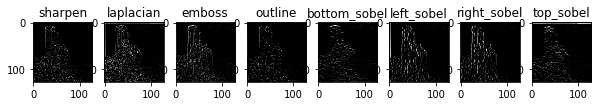

In [30]:
relu_data = []
relu(result)
plot(relu_data,j)

In [31]:
asus = relu_data[0]
for i in range (7):
    asus = np.add(asus , relu_data[i+1])

(128, 128)

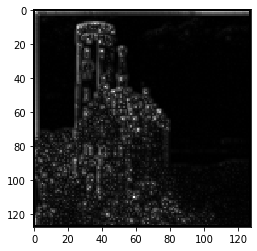

In [32]:
plt.imshow(asus)
asus.shape

(64, 64)

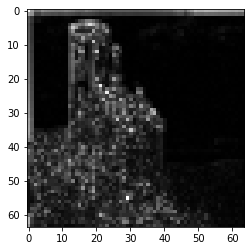

In [33]:
jamy = maxpooling(asus)
#print(jamy)
plt.imshow(jamy)
jamy.shape